## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

## About Dataset

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.<br>

###List of columns
• **Sex :** male or female(Nominal)<br>
• **Age :** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral<br>
• **Current Smoker :** whether or not the patient is a current smoker (Nominal)<br>
• **Cigs Per Day :** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
**Medical( history)**<br>
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)<br>
•**Prevalent Stroke :** whether or not the patient had previously had a stroke (Nominal)<br>
• **Prevalent Hyp :** whether or not the patient was hypertensive (Nominal)<br>
• **Diabetes :** whether or not the patient had diabetes (Nominal)<br>
**Medical(current)**<br>
• **Tot Chol :** total cholesterol level (Continuous)<br>
• **Sys BP :** systolic blood pressure (Continuous)<br>
• **Dia BP :** diastolic blood pressure (Continuous)<br>
• **BMI :** Body Mass Index (Continuous)<br>
• **Heart Rate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• **Glucose :** glucose level (Continuous)<br>
**Predict variable (desired target)**<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

In [1]:
# Imports

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score , f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,classification_report,roc_auc_score, roc_curve, precision_recall_curve
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import scipy.stats as stats

## Getting the Data

In [2]:
# Now let's read the dataset:

df = pd.read_csv("Heart_disease_data.csv")
df.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2826,0,41,2.0,0,0.0,0.0,0,0,0,232.0,117.5,77.5,20.62,53.0,75.0,0
2563,0,43,2.0,0,0.0,0.0,0,0,0,273.0,119.0,72.0,24.59,90.0,75.0,0
1089,0,40,1.0,1,9.0,0.0,0,0,0,239.0,118.0,78.0,23.48,85.0,75.0,1
1863,0,50,2.0,1,20.0,0.0,0,0,0,235.0,121.0,78.0,23.01,52.0,78.0,0
2149,0,37,2.0,1,20.0,0.0,0,0,0,154.0,106.0,59.5,22.71,72.0,50.0,0
3624,0,38,3.0,1,25.0,0.0,0,0,0,205.0,117.5,77.0,21.44,100.0,NaN,0
956,0,63,1.0,0,0.0,0.0,0,0,0,252.0,118.0,84.0,25.31,98.0,82.0,0
2201,1,45,1.0,0,0.0,0.0,0,0,0,258.0,128.0,79.0,32.03,70.0,75.0,0
228,0,50,1.0,0,0.0,0.0,0,0,0,273.0,131.0,93.0,27.61,80.0,94.0,0
1806,0,40,3.0,1,1.0,0.0,0,0,0,236.0,135.0,83.0,23.48,95.0,90.0,0


##Checking the data

In [3]:
# Getting the bascic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
# Getteing the basic information about the distribution of our datasets
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

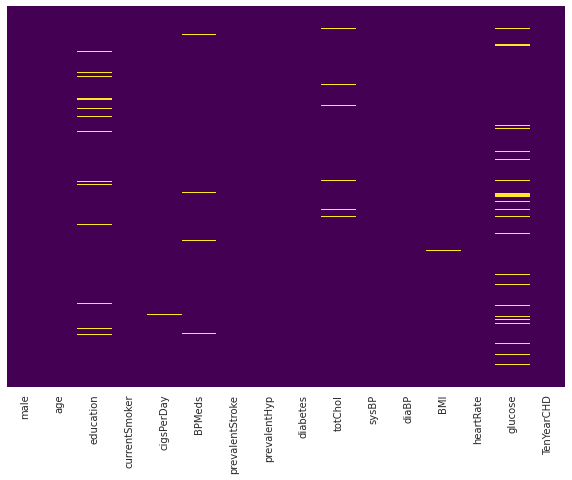

In [5]:
# Checking null values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**It seems like our data contain lot of missing values in it.
Glucose column seems to have the most missing values followed by education column.**

## Handling the missing values

In [6]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
dtype: int64

In [7]:
# Lets see how much percent of data is missing 
df.isnull().sum()/len(df)*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

We have 388 null values in 'glucose' column. Which is the highest almost 9.15% data of the glucose is missing.

Other columns like education, BPMeds, totChol, cigsPerDa, BMI and heartRate have (1~2)% data missing

We will apply the Univirate imputaion to fill in the missing values.
Univariate imputation consists mean, median, mode, constant, missing indicator and and random value imputation, also we can drop that row. Here I would be using meadian value to replace the missing values

After filling in the null values there is one thing we should keep in mind that the changes we have made (refers to the value we have added) does not effect the variance of the data by a large margin

In [8]:
null_columns = ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

In [9]:
variance=[]
variance_median=[]
for col in null_columns:
    df[col + '_median']=df[col].fillna(df[col].median())
    variance.append(df[col].var())
    variance_median.append(df[col + '_median'].var())
    

In [10]:
df_variance=pd.DataFrame({ "Old Variance": variance,
                          "New Variance" : variance_median},
                         index=['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate'])
df_variance["Difference"]=df_variance["Old Variance"]-df_variance["New Variance"]
df_variance

,Old Variance,New Variance,Difference
glucose,574.081513,522.819454,51.262059
education,1.039973,1.014211,0.025762
BPMeds,0.028759,0.028410,0.000349
totChol,1988.297915,1964.920781,23.377133
cigsPerDay,142.088631,141.667096,0.421535
BMI,16.647306,16.573376,0.073930
heartRate,144.639020,144.605065,0.033955


As we can see glucose and totchol column has the most change in their variance , so filling the null values with median was not a good good choice for those two columns.

So we will use random value imputation for these two columns

In [11]:
import random
df['glucose_random']=df['glucose']
df['totchol_random']=df['totChol']
df['glucose_random'].fillna(random.choice(df['glucose_random'][df['glucose_random'].notna()]), inplace=True)
df['totchol_random'].fillna(random.choice(df['totchol_random'][df['totchol_random'].notna()]), inplace=True)
print("The value of glucose variance before random imputaion : ",df['glucose'].std())
print("The value of glucose variance after random imputaion : ",df['glucose_random'].std())
print("The value of totchol variance before random imputaion : ",df['totChol'].std())
print("The value of totchol variance after random imputaion : ",df['totchol_random'].std())

The value of glucose variance before random imputaion :  23.959998189237478
The value of glucose variance after random imputaion :  22.844131829675277
The value of totchol variance before random imputaion :  44.590334318749456
The value of totchol variance after random imputaion :  45.15473304258278


As we can see with random value imputation the variace of the new column is almost same as the privious column.

In [12]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'glucose_median',
       'education_median', 'BPMeds_median', 'totChol_median',
       'cigsPerDay_median', 'BMI_median', 'heartRate_median', 'glucose_random',
       'totchol_random'],
      dtype='object')

In [13]:
new_df=df[['male', 'age', 'currentSmoker','prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP',
       'diaBP', 'TenYearCHD','education_median', 'BPMeds_median',
       'cigsPerDay_median', 'BMI_median', 'heartRate_median', 'glucose_random',
       'totchol_random']]
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               4238 non-null   int64  
 1   age                4238 non-null   int64  
 2   currentSmoker      4238 non-null   int64  
 3   prevalentStroke    4238 non-null   int64  
 4   prevalentHyp       4238 non-null   int64  
 5   diabetes           4238 non-null   int64  
 6   sysBP              4238 non-null   float64
 7   diaBP              4238 non-null   float64
 8   TenYearCHD         4238 non-null   int64  
 9   education_median   4238 non-null   float64
 10  BPMeds_median      4238 non-null   float64
 11  cigsPerDay_median  4238 non-null   float64
 12  BMI_median         4238 non-null   float64
 13  heartRate_median   4238 non-null   float64
 14  glucose_random     4238 non-null   float64
 15  totchol_random     4238 non-null   float64
dtypes: float64(9), int64(7)


In [14]:
new_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
education_median     0
BPMeds_median        0
cigsPerDay_median    0
BMI_median           0
heartRate_median     0
glucose_random       0
totchol_random       0
dtype: int64

**We have successfully handle all the null values in the data**

In [15]:
# Checking for duplicated values

duplicated = len(new_df[new_df.duplicated()])
print(f'There ara {duplicated} duplicated rows')

There ara 0 duplicated rows


In [16]:
# Checking the corelation
new_df.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD           1.000000
age                  0.225256
sysBP                0.216429
prevalentHyp         0.177603
diaBP                0.145299
glucose_random       0.119842
diabetes             0.097317
male                 0.088428
BPMeds_median        0.086417
totchol_random       0.078500
BMI_median           0.074217
prevalentStroke      0.061810
cigsPerDay_median    0.058859
heartRate_median     0.022857
currentSmoker        0.019456
education_median    -0.053383
Name: TenYearCHD, dtype: float64

<Axes: >

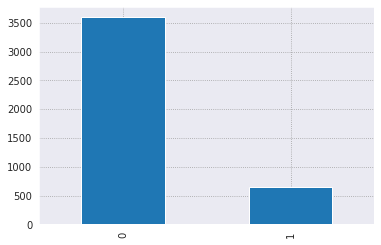

In [17]:
# Checking the balance of the data
new_df['TenYearCHD'].value_counts().plot(kind='bar')

In [18]:
new_df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

**Acording to our TenYearCHD column, ther are var less people data in the dataset those have  coronary heart disease as compared to those who don't ,it very which says that is our data is very imbalanced**

## Exploratory Data Analysis

In [19]:
categorical_columns =['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD', 'education_median',
       'BPMeds_median']
numerical_columns =['age', 'sysBP', 'diaBP', 'cigsPerDay_median', 'BMI_median', 'heartRate_median',
       'glucose_random', 'totchol_random','TenYearCHD']

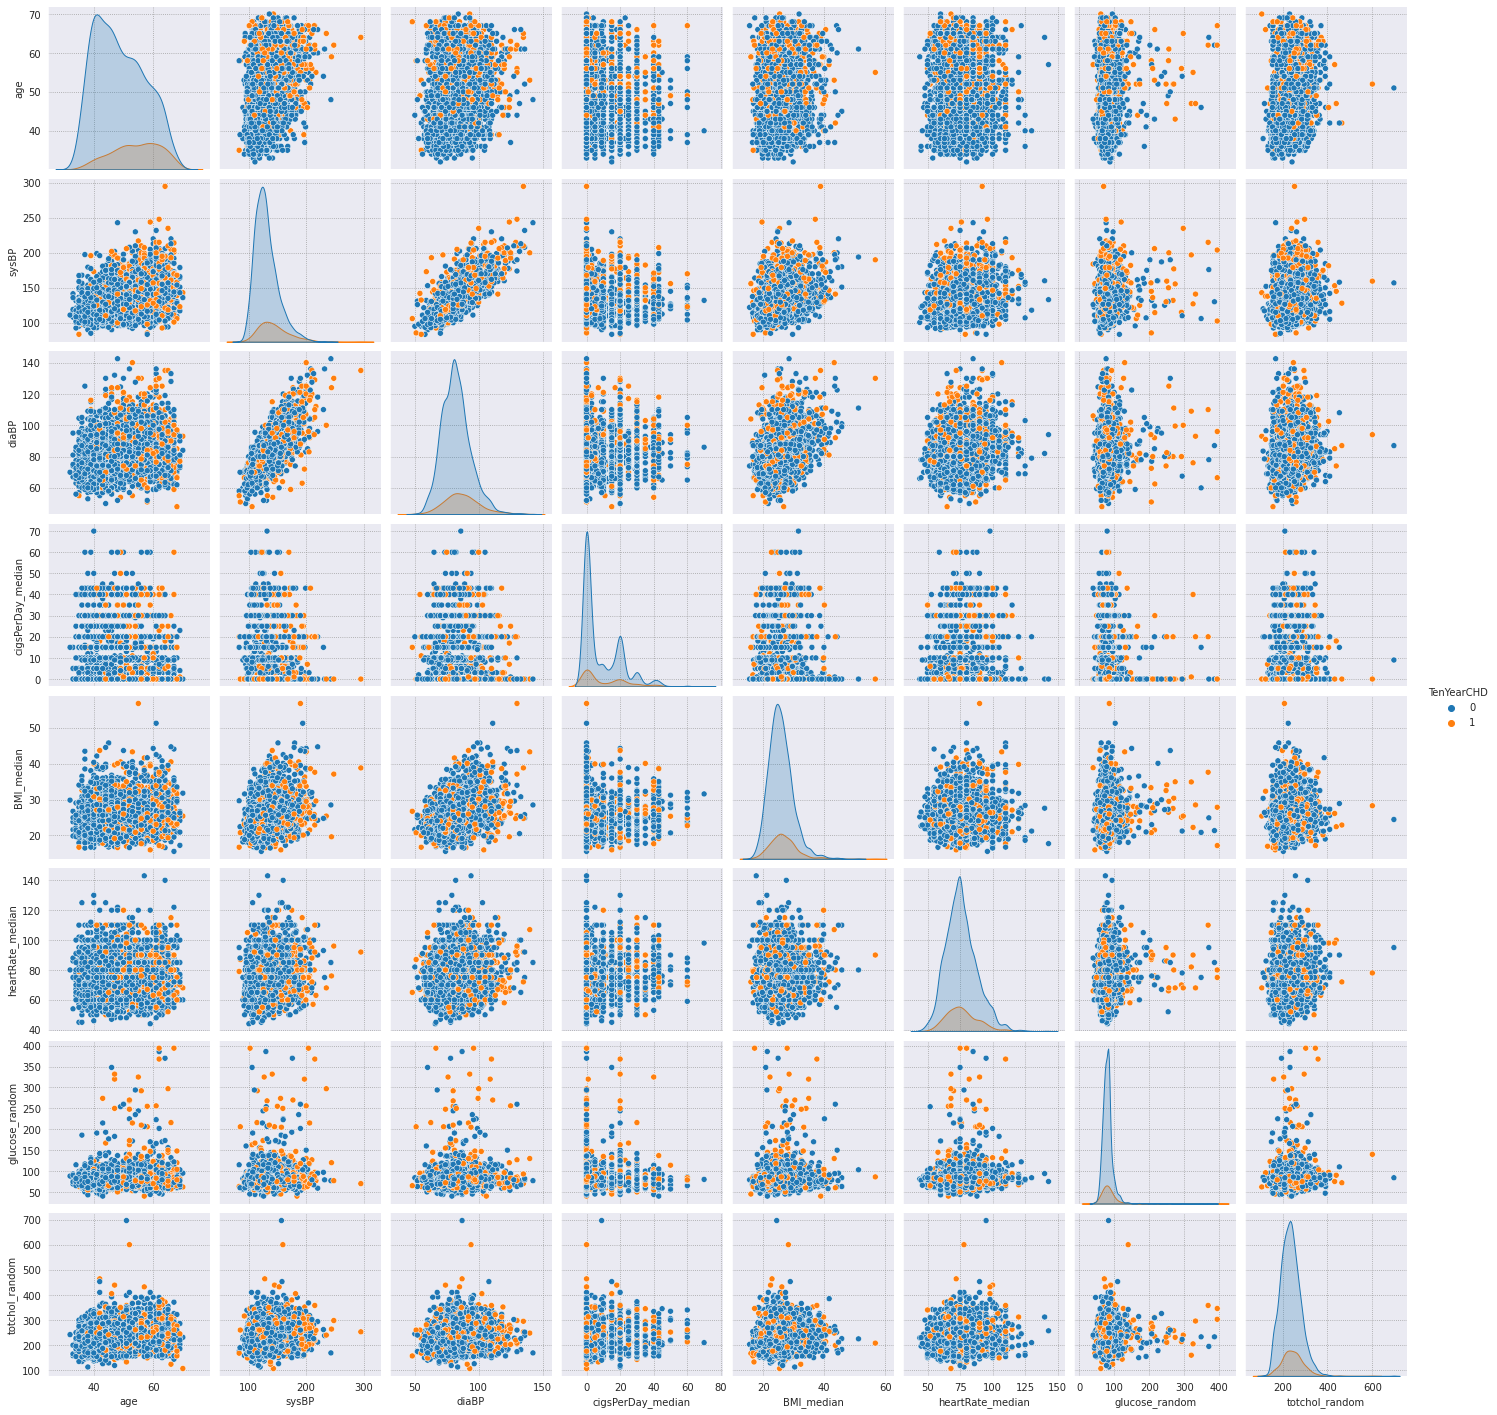

In [20]:
sns.pairplot(new_df[numerical_columns],hue='TenYearCHD')

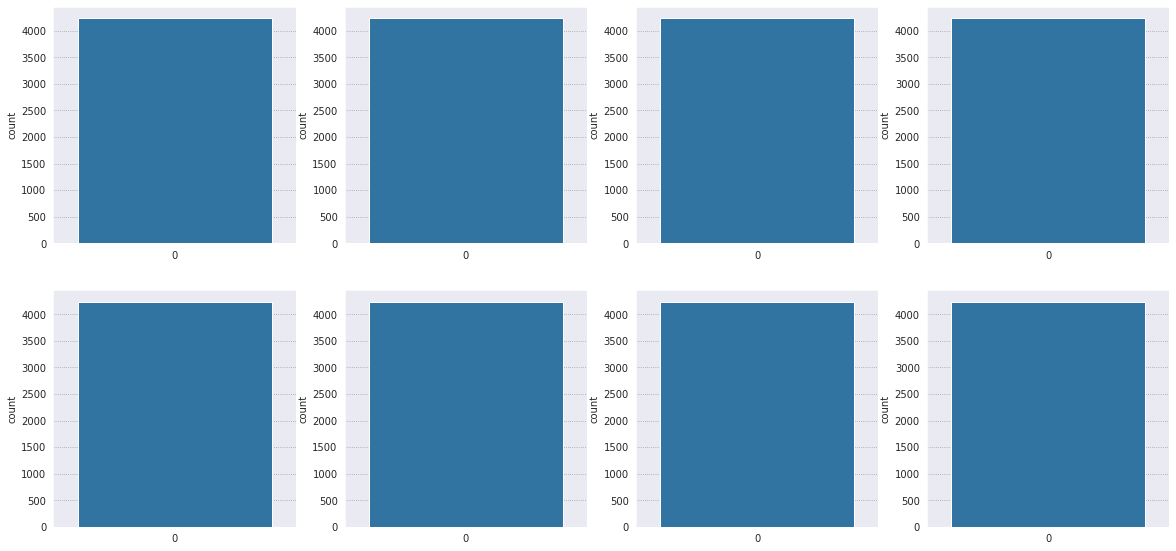

In [21]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    plt.subplot(4,4,i)
    sns.countplot(new_df[categorical_columns[i-1]])




1.   There are more number of female than male
2.   Very less patient had prevalent stokes
3.   Less patient were hypertensive
4.   Very less patient had diabetes
5.   Acoording to data very less patient actually had the disease (Data is highly imbalanced)
6.   Very less patient was on blood pressure medication




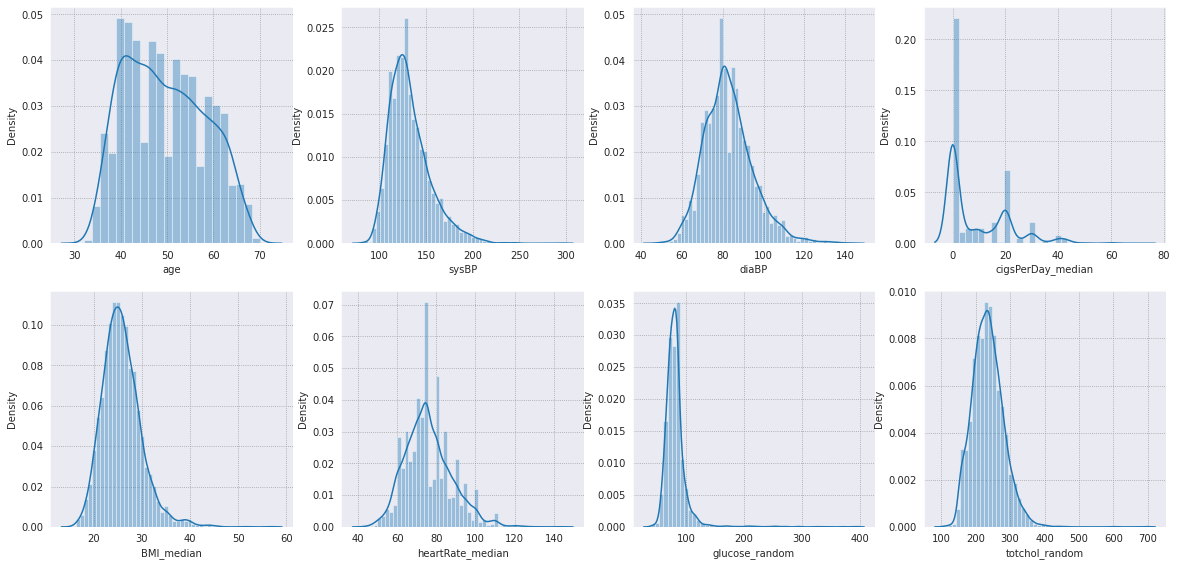

In [22]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    plt.subplot(4,4,i)
    sns.distplot(new_df[numerical_columns[i-1]])

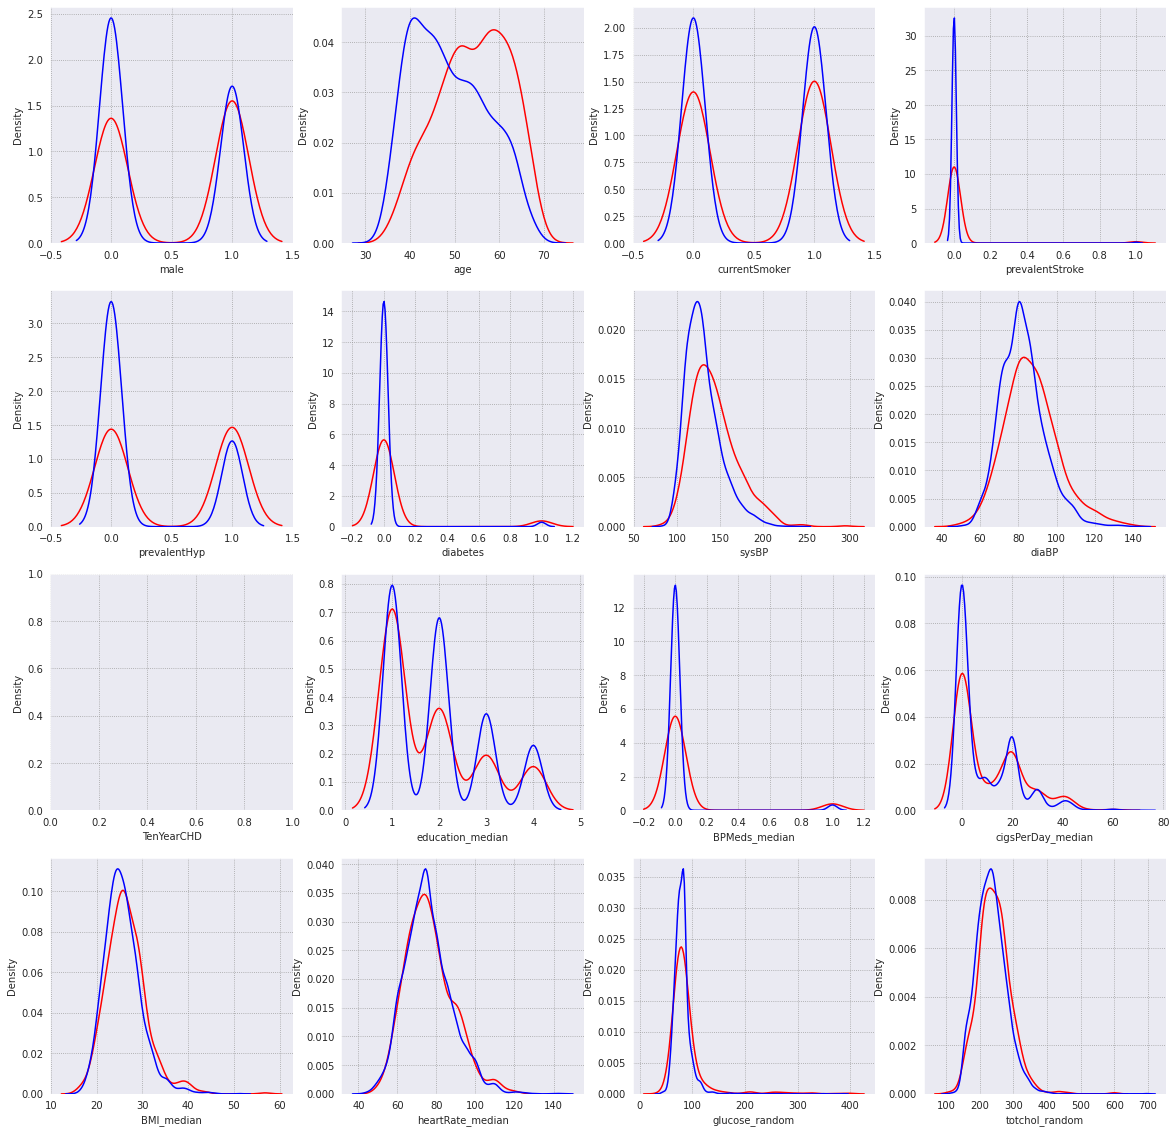

In [23]:
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(new_df[new_df['TenYearCHD']==1][new_df.columns[i-1]],hist=False,color='red')
    sns.distplot(new_df[new_df['TenYearCHD']==0][new_df.columns[i-1]],hist=False,color='blue')



1.   According to data more number of male patient had the risk of CHD compare to female
2.   The age of the patient who had the risk of CHD is more on on the older side (above 50 years)
3.   The patient that had been  hypertensive  have more risk of CHD
4.   The patient that had diabetes have more risk of CHD
5.   The patient that had CHD tends to have more systolic and diastolic blood pressure
6.   The patient that had more than 20 cigrates in a day have more risk of CHD


In [24]:
new_df.groupby('TenYearCHD').mean()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,education_median,BPMeds_median,cigsPerDay_median,BMI_median,heartRate_median,glucose_random,totchol_random
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,0.003895,0.275737,0.019199,130.333612,82.160963,2.002226,0.023094,8.644964,25.672323,75.762382,80.994157,234.280746
1,0.532609,54.145963,0.517081,0.017081,0.504658,0.062112,143.618789,86.981366,1.852484,0.063665,10.596273,26.513882,76.527950,88.619565,244.153727


## Outlier Detection and Removal 

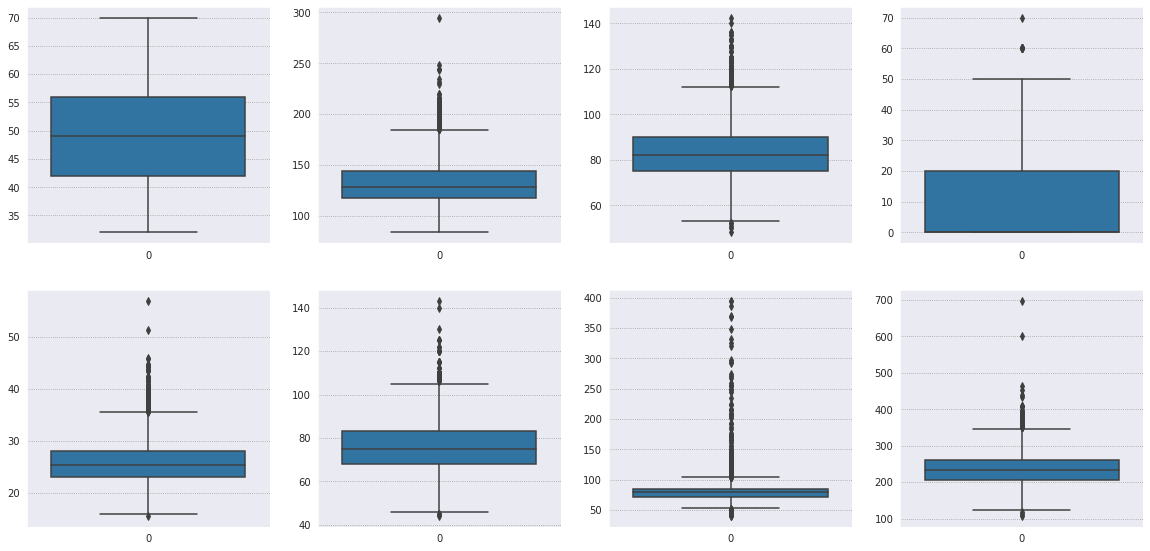

In [25]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    plt.subplot(4,4,i)
    sns.boxplot(new_df[numerical_columns[i-1]])

Except for the age column every column have some outliers

In [26]:
col=['sysBP','diaBP','cigsPerDay_median', 'BMI_median', 'heartRate_median', 'glucose_random','totchol_random']
for i in col:
    q1=new_df[i].quantile(.25)
    q3=new_df[i].quantile(.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    new_df[i]=np.where(new_df[i]>upper_limit,upper_limit,
                np.where(new_df[i]<lower_limit,lower_limit,new_df[i]))

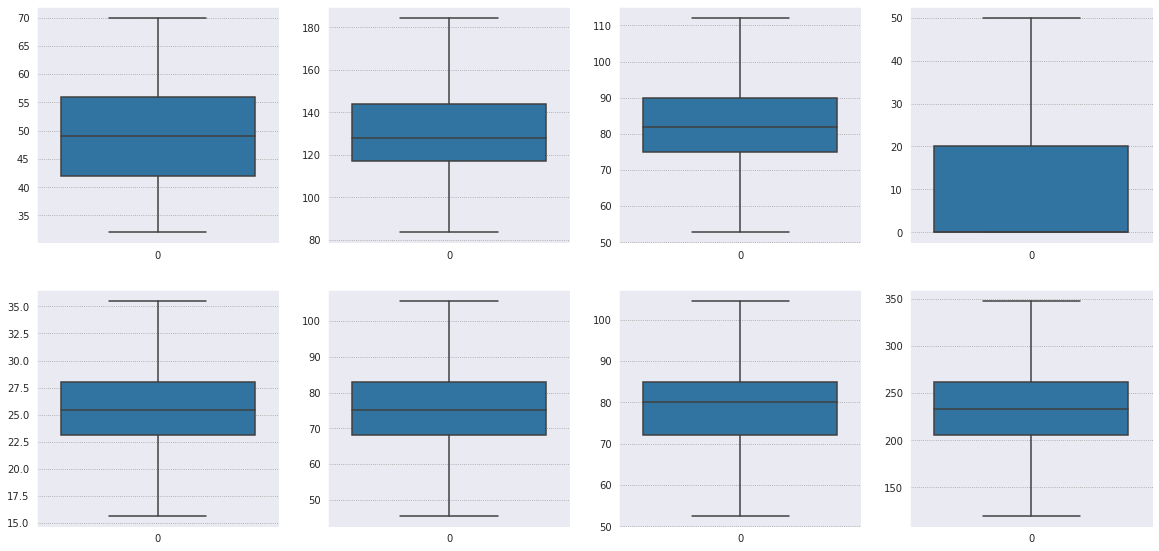

In [27]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    plt.subplot(4,4,i)
    sns.boxplot(new_df[numerical_columns[i-1]])

## Corelation

In [28]:
new_df.corr()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,education_median,BPMeds_median,cigsPerDay_median,BMI_median,heartRate_median,glucose_random,totchol_random
male,1.000000,-0.028979,0.197596,-0.004546,0.005313,0.015708,-0.030095,0.063325,0.088428,0.017205,-0.051545,0.315879,0.102312,-0.116487,-0.013893,-0.057622
age,-0.028979,1.000000,-0.213748,0.057655,0.307194,0.101258,0.397920,0.206682,0.225256,-0.163547,0.120955,-0.193645,0.137018,-0.014283,0.116178,0.259117
currentSmoker,0.197596,-0.213748,1.000000,-0.032988,-0.103260,-0.044295,-0.130087,-0.107686,0.019456,0.018273,-0.048358,0.765436,-0.170351,0.066365,-0.063241,-0.053677
prevalentStroke,-0.004546,0.057655,-0.032988,1.000000,0.074830,0.006949,0.060398,0.048341,0.061810,-0.035150,0.114609,-0.032376,0.012120,-0.017436,0.004673,0.003494
prevalentHyp,0.005313,0.307194,-0.103260,0.074830,1.000000,0.077808,0.713008,0.622958,0.177603,-0.081021,0.258697,-0.066566,0.296577,0.147003,0.081937,0.157805
diabetes,0.015708,0.101258,-0.044295,0.006949,0.077808,1.000000,0.103138,0.046139,0.097317,-0.038136,0.051394,-0.036099,0.079312,0.049339,0.264449,0.033184
sysBP,-0.030095,0.397920,-0.130087,0.060398,0.713008,0.103138,1.000000,0.782594,0.209686,-0.129073,0.243111,-0.088021,0.319020,0.181762,0.117011,0.205997
diaBP,0.063325,0.206682,-0.107686,0.048341,0.622958,0.046139,0.782594,1.000000,0.140473,-0.060799,0.191711,-0.055622,0.370262,0.182718,0.049766,0.171008
TenYearCHD,0.088428,0.225256,0.019456,0.061810,0.177603,0.097317,0.209686,0.140473,1.000000,-0.053383,0.086417,0.059452,0.071243,0.022828,0.059001,0.075862
education_median,0.017205,-0.163547,0.018273,-0.035150,-0.081021,-0.038136,-0.129073,-0.060799,-0.053383,1.000000,-0.010365,0.008041,-0.132060,-0.052507,-0.025242,-0.018276


In [29]:
new_df.corr()['TenYearCHD'].sort_values(ascending = False)

TenYearCHD           1.000000
age                  0.225256
sysBP                0.209686
prevalentHyp         0.177603
diaBP                0.140473
diabetes             0.097317
male                 0.088428
BPMeds_median        0.086417
totchol_random       0.075862
BMI_median           0.071243
prevalentStroke      0.061810
cigsPerDay_median    0.059452
glucose_random       0.059001
heartRate_median     0.022828
currentSmoker        0.019456
education_median    -0.053383
Name: TenYearCHD, dtype: float64

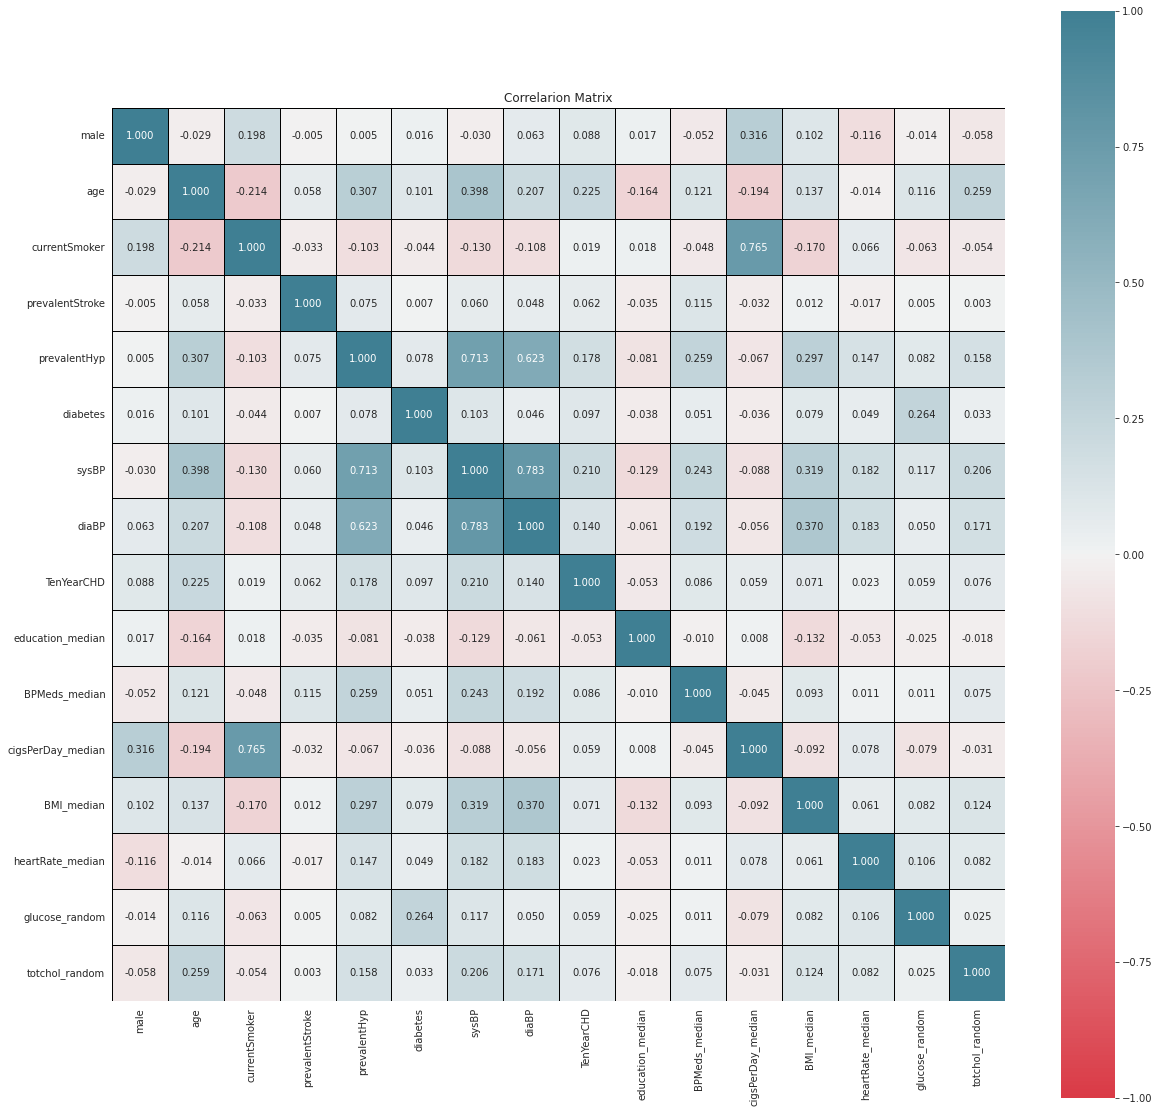

In [30]:
plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(
    data=new_df.corr(), 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',

)
plt.title('Correlarion Matrix')
plt.show()

##Splitting The Data

In [31]:
X = new_df.drop('TenYearCHD',axis=1)
y=new_df['TenYearCHD']

In [32]:
X = StandardScaler().fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

## Balancing the dataset

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

In [34]:
smote = SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

<Axes: >

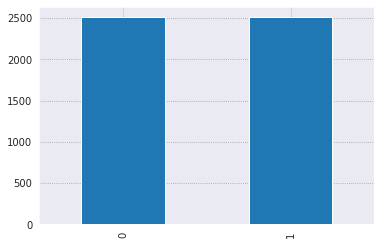

In [35]:
y_train.value_counts().plot(kind='bar')

##Logistic Regression model

In [36]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', None],
              'C':[0.1,0.5,1],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}


In [37]:
logreg =  LogisticRegression() 
clf = GridSearchCV(logreg , parameters,cv=5,scoring = 'roc_auc')
clf.fit(X_train,y_train) 
print (clf.best_params_)
print(clf.best_score_)
y_pred=clf.predict(X_test)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7356057840351741


Text(0.5, 257.44, 'Predicted label')

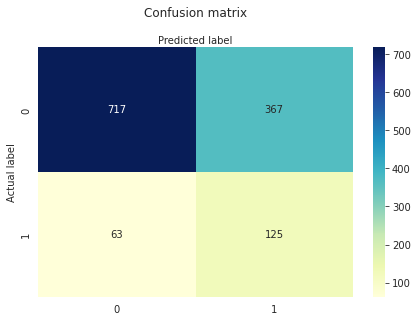

In [38]:
class_names=[0,1] # name  of classes 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1084
           1       0.25      0.66      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.66      0.57      1272
weighted avg       0.82      0.66      0.71      1272



As we can see in the above model. The number of False negative ( people who should have been predicted as CHD positive were predicted as negative ) is high
as this is the worst type of prediction our model can make.

We can give more importance to the False negative by adjusting the threshold value of the model ( The default value is 0.5)


In [44]:
def custom_predict(X, threshold):
    probs = clf.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

In [45]:
new_preds = custom_predict(X=X_test, threshold=0.432499) 

Text(0.5, 257.44, 'Predicted label')

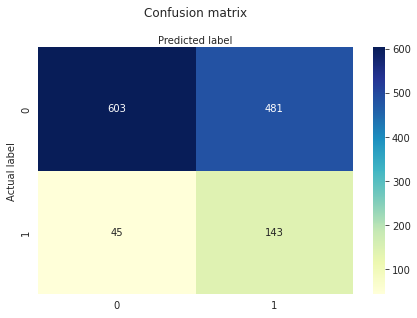

In [46]:
class_names=[0,1] # name  of classes 
cnf_matrix = metrics.confusion_matrix(y_test, new_preds) 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [47]:
print(classification_report(y_test,new_preds))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1084
           1       0.23      0.76      0.35       188

    accuracy                           0.59      1272
   macro avg       0.58      0.66      0.52      1272
weighted avg       0.83      0.59      0.65      1272



##★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★